In [15]:
import numpy as np
from scipy.sparse import random
import matplotlib.pyplot as plot

In [16]:
V = 9 # number of features
R = 50 # size of reservoir
LEARN_TIME = 10
READOUT_TIME = 100
LEARNING_RATE = 0.001
DENSITY = 0.25

Wr = random(R, R, density=DENSITY).toarray()
# Win = random(V, R, density=DENSITY).toarray()
Win = np.random.random((V, R))
W_readout = np.random.random((R, 2))

X = np.array([[[1, 0, 1], [0, 1, 0], [1, 0, 1]], [[1, 1, 1], [1, 0, 1], [1, 1, 1]]])
h = np.random.random((R, 1))
y = np.array([[0, 1], [1, 0]]) 
delta = []

In [17]:
def advance_state(activation_function):
    global h, x, Win, Wr, delta
    h_new = np.matmul(Win.transpose(), x) + np.matmul(Wr.transpose(), h)
    h_new = activation_function(h_new)
    delta.append(np.sum(h_new - h))
    h = h_new

In [18]:
def relu(x):
    if x > 0:
	    return x
    else:
        return 0
    
def linear(x):
	return x

def sigmoid(x):
	return 1/(1 + np.exp(-x))

In [19]:
def forward(x):
	global Win, Wr, h
	predict = np.matmul(Win.transpose(), x) + np.matmul(Wr.transpose(), h)
	return np.matmul(W_readout.transpose(), predict)

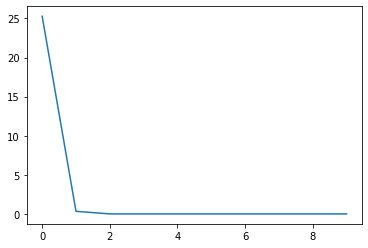

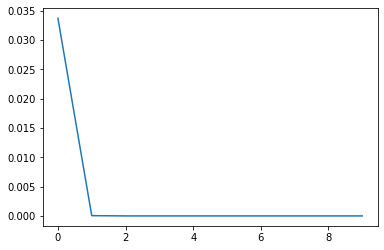

In [20]:
for datapoint in range(2):
	x = X[datapoint].flatten().reshape((9,1))
	label = y[datapoint].reshape((2,1))
	
	for iteration in range(LEARN_TIME):
	    advance_state(sigmoid)
	
	global delta
	fig, ax = plot.subplots()
	ax.plot(range(delta.__len__()), delta)
	delta = []

	for iteration in range(READOUT_TIME):
		predict = forward(x)
		W_readout[:,0] = W_readout[:,0] - LEARNING_RATE * (predict[0] - label[0])
		W_readout[:,1] = W_readout[:,1] - LEARNING_RATE * (predict[1] - label[1])

In [21]:
print(forward(X[0].flatten().reshape((9,1))))
print(forward(X[1].flatten().reshape((9,1))))

[[ 3.72327524]
 [-0.91409606]]
[[1.00000000e+00]
 [5.17969559e-16]]
